In [126]:
import os
import numpy as np
import pandas as pd
import plotly as pl
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt

In [101]:
data = pd.read_csv("./babyNamesUSYOB-mostpopular.csv")
START_YEAR = 1880
END_YEAR = 2015
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224261 entries, 0 to 224260
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   index        224261 non-null  int64 
 1   YearOfBirth  224261 non-null  int64 
 2   Name         224261 non-null  object
 3   Sex          224261 non-null  object
 4   Number       224261 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 8.6+ MB
None
   index  YearOfBirth       Name Sex  Number
0      0         1880       Mary   F    7065
1      1         1880       Anna   F    2604
2      2         1880       Emma   F    2003
3      3         1880  Elizabeth   F    1939
4      4         1880     Minnie   F    1746


In [163]:
# task_3

def bar_by_name(name, sex):
    data_ind = data.set_index(["Name", "Sex"])
    df = data_ind.query('Name == @name and Sex == @sex')

    max_numbers = max(df.Number.to_numpy())
    min_numbers = min(df.Number.to_numpy())

    print(f"len Numbers: {len(df.Number.to_numpy())}")
    print(f"len Year: {len(df.YearOfBirth.to_numpy())}")
    print(f"min: {min_numbers}")
    print(f"min: {max_numbers}")
    fig = px.bar(df, x='YearOfBirth', y='Number',
                 # data_frame=data_ind.loc[name],
                 color='Number',
                 color_continuous_scale="agsunset",
                 labels={'x': 'years', 'y': "numbers"}
                 )


    fig.update_layout(
         title = {
            'text': f"Name numbers by year of {name} ",
            'y':0.94, # new
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top' # new
        },
        titlefont=dict(
            size= 20
        ),
        font=dict(
            size= 14
        )
    )

    fig.update_xaxes(
        range=[START_YEAR, END_YEAR]
    )

    fig.update_yaxes(
        range=[min_numbers - min_numbers*0.1, float(max_numbers)],
        dtick = fig.layout.yaxis.ticklabelstep
    )


    fig.show()

bar_by_name("Mary", "F")

len Numbers: 136
len Year: 136
min: 2566
min: 73983


KeyboardInterrupt: 

In [ ]:

def circle_by_name(name, sex, start_year, end_year):
    data_ind = data.set_index(["YearOfBirth"])
    df = data_ind.query('Name == @name and Sex == @sex')

    # for val in df.iterrows():
    #     print(val)

    start_ind = start_year - START_YEAR
    end_ind = end_year - START_YEAR

    fig = px.pie(names=df.index.to_numpy()[start_ind: end_ind] , values=df.Number.to_numpy()[start_ind: end_ind], width=1000, height=1000)

    fig.update_layout(
        title = {
            'text': f"Name numbers by year of {name} ",
            'y':0.94, # new
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top' # new
        },
        titlefont=dict(
            size= 20
        ),
        font=dict(
            size= 14
        )
    )


    fig.show()

circle_by_name("Mary", "F", 1880, 1900)

len Numbers: 136
len Year: 136
min: 2566
min: 73983


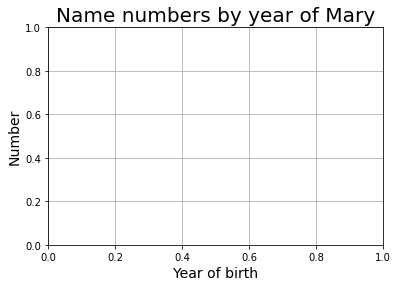

In [137]:
def circle_by_name(name, sex):
    data_ind = data.set_index(["Name", "Sex"])
    df = data_ind.query('Name == @name and Sex == @sex')

    max_numbers = max(df.Number.to_numpy())
    min_numbers = min(df.Number.to_numpy())

    # for val in df.iterrows():}]
    #     print(val)

    print(f"len Numbers: {len(df.Number.to_numpy())}")
    print(f"len Year: {len(df.YearOfBirth.to_numpy())}")
    print(f"min: {min_numbers}")
    print(f"min: {max_numbers}")

    plt.grid(True)
    plt.title(f"Name numbers by year of {name}", fontsize=20)
    plt.xlabel("Year of birth", fontsize=14)
    plt.ylabel("Number", fontsize=14)
    plt.yticks(np.arrange)

    plt.show()



circle_by_name("Mary", "F")